# Jaystin Notebook - Intro to Jupyter and Exploratory Data Analysis (EDA)

REQ: Open notebooks with a standard header including a good title, your company/name/alias, a link to the repo, purpose, and date.

REQ: For EDA projects, include dataset, description, and source information.

- Author: [Jaystin Garcia](https://github.com/jaystingarcia-glitch/)
- Repository: [datafun-04-notebooks](https://github.com/jaystingarcia-glitch/datafun-04-notebooks/)
- Purpose: Demonstrate a repeatable EDA workflow for a new, unexplored dataset
- Date: 2026-01

## Dataset Information

- Dataset: Palmer Penguins
- Description: Size measurements for three penguin species (Adelie, Chinstrap, Gentoo) observed on three islands in the Palmer Archipelago, Antarctica.
- Source: [palmerpenguins R package](https://allisonhorst.github.io/palmerpenguins/)
- Original Collection: Dr. Kristen Gorman and the Palmer Station Long Term Ecological Research (LTER) Program
- Citation: Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/
- Access: Available via Seaborn's built-in datasets

This is a Markdown cell.

## Section 0. Intro to Jupyter Notebooks

This is a Markdown cell (not a Python cell). 
Here are a few tips to help you get started with Jupyter Notebooks:

- To run a cell, press **Ctrl+Enter** (or **Cmd+Enter** on Mac) when you're done editing the cell.
- You can change the type of a cell (e.g., code or markdown) by looking in the lower left corner of the notebook interface.
- You can rearrange cells by dragging and dropping them within the notebook.
- After creating a new notebook, use **File > Save as** to rename and save it into your repository folder.
- To select a kernel (Python environment) for your notebook in Visual Studio Code, click on the **Select Kernel** name in the top-right corner of the notebook interface and choose the desired kernel from the dropdown menu. Follow suggestions to install recommended extensions. Once installed, click Select Kernel / Python Environments and choose the Recommended `.venv` option we created earlier. This will create a new kernel for the notebook and allow you to run code in the notebook using the packages installed in the virtual environment.

Once you are skilled with Notebooks, you can delete this entire cell or make your own notes.

This is a Markdown cell.  


## Section 0. Intro to EDA

### WHEN to do EDA

Perform Exploratory Data Analysis (EDA) when encountering a new data source, even if:

- You did not collect the data
- Someone else already analyzed it
- It comes from a trusted system

EDA helps you understand:

- What data you actually have
- What is missing, duplicated, or inconsistent
- What questions the data can and cannot answer

### GOALS of EDA

EDA is not the final report. EDA is about:

- Understanding structure and scale
- Detecting issues early
- Identifying next steps (cleaning, modeling, collection)

This notebook shows a standard EDA workflow that works for most **tabular** datasets.

Once you understand EDA, you can delete this entire cell or make your own notes.

This is a Markdown cell.

## Section 1. Project Setup and Imports

All imports and configuration appear once, at the top of the notebook.

WHY:
- Keeps notebooks readable and reproducible
- Mirrors professional scripts
- Makes it clear what must be installed

This is a Markdown cell.

In [20]:
# This is a Python cell.

# Imports at the top of the file
# REQ.EXTERNAL.DEPS: External packages must be defined in pyproject.toml
# REQ.EXTERNAL.DEPS.INSTALLED: external packages must be installed in the environment using uv sync command
# REQ.EXTERNAL.DEPS.IMPORTED: external packages used in this notebook must be imported here


from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Type hint for Axes object (basic plot type returned by Seaborn)
# A seaborn plot is a set of axes and you can set the title, labels, etc. on the axes.

# A figure can contain multiple axes (plots)
# from matplotlib.figure import Figure

# Pandas display configuration (helps in notebooks)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

print("Imports complete.")
print(sns.get_dataset_names())

Imports complete.
['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


## Section 2. Load the Data

This is a Markdown cell.

WHY: Before analysis, load the data to confirm:

- The dataset loads successfully
- The structure matches expectations
- Column names are available and readable

This is a Markdown cell.

In [21]:
# Python cell

# Load the iris dataset from Seaborn
# Into a pandas DataFrame (2D table)
iris_df = sns.load_dataset('iris')

# Preview the first few rows
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Section 3. Inspect Data Shape and Structure

WHY: First, understand the shape (basic structure) of the data:

- How many rows and columns are there?
- What types of data are present?
- Are there obvious missing values?

This step determines challenges we might have downstream (later).

This is a Markdown cell.

In [22]:
# Section 3 Python cell

# Get shape - number of rows and columns
shape: tuple[int, int] = iris_df.shape

# Communicate the shape clearly
print(f"The iris dataset has {shape[0]} rows and {shape[1]} columns.")

The iris dataset has 150 rows and 5 columns.


In [23]:
# Section 3 Python cell

# Display column names and data types
iris_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    str    
dtypes: float64(4), str(1)
memory usage: 6.0 KB


In [24]:
# Section 3 Python cell

# List the column names
print("Column names:")
print(list(iris_df.columns))

Column names:
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


## Section 4. Create Data Dictionary and Check Data Quality

WHY: Missing data is normal. We need to find out how much and where.

Missing data affects:

- Visualizations
- Summary statistics
- Machine learning models

LOOK FOR: 

- Columns with many missing values
- Patterns (entire rows missing multiple fields)

This is a Markdown cell.


In [25]:
# Section 4 Python cell

# Count missing values in each column
print("Missing values per column:")
print(iris_df.isnull().sum())

Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [26]:
# Section 4 Python cell

# Check for duplicate rows
num_duplicates = iris_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 1


## Section 5. Create Clean View for EDA

WHY: We often want to work with complete data for visualizations and statistics.

Strategy:
- Keep the original DataFrame unchanged
- Create a separate clean view by dropping rows with missing values

This is a Markdown cell.

In [27]:
# Section 5 Python cell

# Create a clean view by dropping rows with any missing values
iris_clean: pd.DataFrame = iris_df.dropna()

# Compare sizes
print(f"Original dataset: {len(iris_df)} rows")
print(f"Clean dataset: {len(iris_clean)} rows")
print(f"Rows removed: {len(iris_df) - len(iris_clean)}")

Original dataset: 150 rows
Clean dataset: 150 rows
Rows removed: 0


## Section 6. Descriptive Statistics for Numeric Columns

WHY: Summary statistics give us a quick overview of the numeric data:

- Central tendency (mean)
- Spread (std, min, max)
- Distribution shape (quartiles)

This is a Markdown cell.

In [28]:
# Section 6 Python cell

# Summary statistics for numeric columns
iris_clean.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
# Section 6 Python cell

# AND/OR Calculate statistics for a specific column with numpy
mean_petal_width = np.mean(iris_clean["petal_width"])
std_petal_width = np.std(iris_clean["petal_width"])
min_petal_width = np.min(iris_clean["petal_width"])
max_petal_width = np.max(iris_clean["petal_width"])
range_petal_width = np.ptp(iris_clean["petal_width"])  # peak to peak (max - min)

print("Petal Width Statistics (using numpy):")
print(f"  Mean: {mean_petal_width:.2f}")
print(f"  Std Dev: {std_petal_width:.2f}")
print(f"  Min: {min_petal_width:.2f}")
print(f"  Max: {max_petal_width:.2f}")
print(f"  Range: {range_petal_width:.2f}")

Petal Width Statistics (using numpy):
  Mean: 1.20
  Std Dev: 0.76
  Min: 0.10
  Max: 2.50
  Range: 2.40


## Section 7. Correlation Matrix for Numeric Columns

WHY: Correlation tells us how numeric variables relate to each other.

- Values near 1 or -1 indicate strong relationships
- Values near 0 indicate weak or no linear relationship

This is a Markdown cell.

In [30]:
# Section 7 Python cell

# Select only numeric columns and compute correlation
numeric_cols = iris_clean.select_dtypes(include="number")
correlation_matrix = numeric_cols.corr()
print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


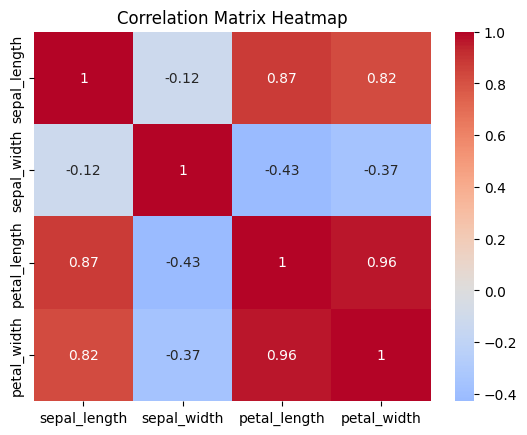

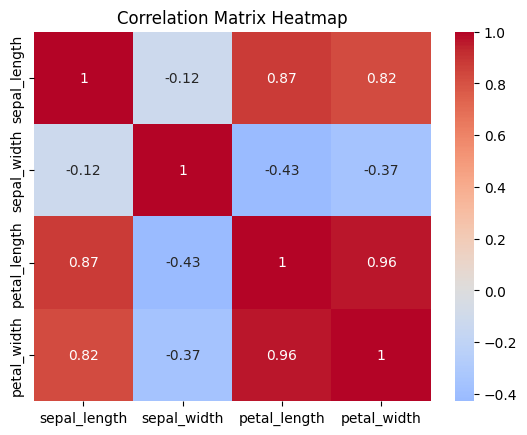

In [31]:
# Section 7 Python cell

# Visualize the correlation matrix as a heatmap
# Set annotations to True to show correlation values
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()


# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()


Use Markdown cells to narrate and tell the story as you explore.

Interpretation:

 - Values close to 1 (dark red) = strong positive correlation (both increase together)
 - Values close to -1 (dark blue) = strong negative correlation (one increases, other decreases)
 - Values close to 0 (white) = little or no linear relationship
 - The diagonal is always 1 (each variable correlates perfectly with itself)

From this heatmap, we can see that **flipper_length_mm** and **body_mass_g** show strong positive correlation (~0.87).

This is a Markdown cell.

## Section 8. Make Plots

WHY: Visualizations reveal patterns not obvious in tables.

Create:
1. A scatter plot to see relationships between two variables
2. A box plot to compare distributions across groups

This is a Markdown cell.

Text(0.5, 1.0, 'Chart 1. Iris Petal Length vs. Petal Width (by Species)')

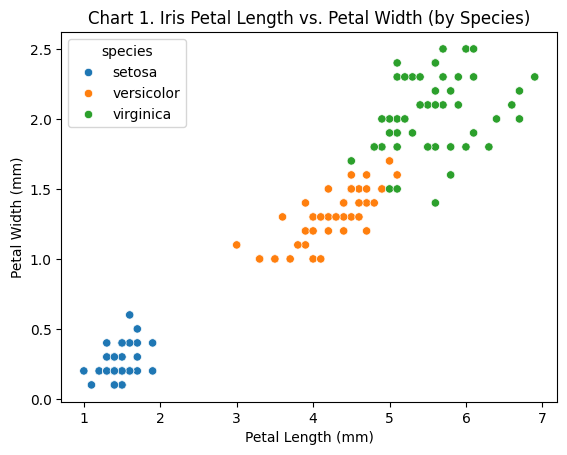

In [32]:
# Section 8 Python cell - use "Run All" so prior cells are executed first.

# Create a scatter plot of penguin flipper length vs. body mass
# We need to know our dataset column names so we can use them to set x, y, and hue (color)
scatter_plt: Axes = sns.scatterplot(
    data=iris_clean, x="petal_length", y="petal_width", hue="species"
)

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Petal Length (mm)")
scatter_plt.set_ylabel("Petal Width (mm)")

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart 1. Iris Petal Length vs. Petal Width (by Species)")

# Run by clicking Run All in the Menu up top

## Section 9. Reminder: Run All before sending to GitHub

Before saving a notebook (and running git add-commit-push), click 'Run All' to generate all outputs and display them in the notebook. 

This is a Markdown cell.
